In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("task2_dataset.xlsx")
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [3]:
df.shape

(100, 52)

In [4]:
df.columns

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST',
       'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_D

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [6]:
df.isna().sum()

VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
O

# Column-Wise Analysis

### Column-Wise Analysis (Columns 1-10)

*   **VIN (Vehicle Identification Number):**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 100 (all unique)
    *   **Significance:** This is the primary key for each vehicle, allowing for unique identification. It's crucial for tracking the history of each vehicle.

*   **TRANSACTION_ID:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 13
    *   **Significance:** This likely represents a type of repair or transaction. Its distribution can reveal common types of service.

*   **CORRECTION_VERBATIM:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 98
    *   **Significance:** This is a free-text field describing the repair performed. It's a rich source of information for understanding the exact nature of the repairs. It will be used for generating tags.

*   **CUSTOMER_VERBATIM:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 99
    *   **Significance:** This is a free-text field describing the customer's complaint. It's crucial for understanding the customer's perspective of the issue and will be used for generating tags.

*   **REPAIR_DATE:**
    *   **Data Type:** `datetime64[ns]`
    *   **Unique Values:** 62
    *   **Significance:** The date of the repair. This allows for time-series analysis to identify trends in repairs.

*   **CAUSAL_PART_NM:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 23 (plus missing values)
    *   **Significance:** The name of the part that caused the issue. This is one of the most critical columns for identifying problematic parts. It has 5 missing values.

*   **GLOBAL_LABOR_CODE_DESCRIPTION:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 13
    *   **Significance:** A description of the labor performed. This provides a standardized way to categorize the repairs.

*   **PLATFORM:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 5
    *   **Significance:** The vehicle platform (e.g., Full-Size Trucks, BEV). This is important for identifying if issues are specific to certain platforms.

*   **BODY_STYLE:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 6
    *   **Significance:** The body style of the vehicle (e.g., Crew Cab, 4 Door Utility). This can help to narrow down issues to specific vehicle models.

*   **VPPC (Vehicle Product Platform Code):**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 22
    *   **Significance:** A more specific code for the vehicle platform. This can be used for more granular analysis.

### Column-Wise Analysis (Columns 11-20)

*   **PLANT:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 7 (plus missing values)
    *   **Significance:** The manufacturing plant where the vehicle was assembled. This can help identify if quality issues are specific to a particular plant. It has 1 missing value.

*   **BUILD_COUNTRY:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 3
    *   **Significance:** The country where the vehicle was built.

*   **LAST_KNOWN_DLR_NAME:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 76
    *   **Significance:** The name of the last known dealer that serviced the vehicle.

*   **LAST_KNOWN_DLR_CITY:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 72
    *   **Significance:** The city of the last known dealer.

*   **REPAIRING_DEALER_CODE:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 76
    *   **Significance:** The code of the dealer that performed the repair. This is a key column for analyzing dealer performance.

*   **DEALER_NAME:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 76
    *   **Significance:** The name of the repairing dealer.

*   **REPAIR_DLR_CITY:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 72
    *   **Significance:** The city of the repairing dealer.

*   **STATE:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 31 (plus missing values)
    *   **Significance:** The state of the repairing dealer. It has 2 missing values.

*   **DEALER_REGION:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 5
    *   **Significance:** The region of the dealer. This can be used for regional analysis of repairs.

*   **REPAIR_DLR_POSTAL_CD:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 72 (plus missing values)
    *   **Significance:** The postal code of the repairing dealer. It has 2 missing values.

### Column-Wise Analysis (Columns 21-30)

*   **REPAIR_AGE:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 66
    *   **Significance:** The age of the vehicle at the time of repair (in days). This is a critical column for understanding the reliability of the vehicle over time.

*   **KM:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 98
    *   **Significance:** The kilometer reading of the vehicle at the time of repair. This is another critical column for reliability analysis.

*   **COMPLAINT_CD_CSI:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 1
    *   **Significance:** A code for the customer complaint. Since it has only one unique value, it's not very useful for analysis in its current state.

*   **COMPLAINT_CD:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 1
    *   **Significance:** Another code for the customer complaint. Similar to `COMPLAINT_CD_CSI`, it has only one unique value and is not very informative.

*   **VEH_TEST_GRP:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 2 (plus missing values)
    *   **Significance:** A code for a vehicle test group. It has 2 missing values.

*   **COUNTRY_SALE_ISO:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 1
    *   **Significance:** The country where the vehicle was sold. Only one country in the dataset.

*   **ORD_SELLING_SRC_CD:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 1
    *   **Significance:** A code for the selling source. Only one unique value.

*   **OPTN_FAMLY_CERTIFICATION:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 1 (plus missing values)
    *   **Significance:** A certification code. It has 10 missing values and only one unique value, so it's not very useful.

*   **OPTF_FAMLY_EMISSIOF_SYSTEM:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 2 (plus missing values)
    *   **Significance:** A code for the emission system. It has 5 missing values.

*   **GLOBAL_LABOR_CODE:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 13
    *   **Significance:** A code for the labor performed. This is a standardized way to categorize repairs.

### Column-Wise Analysis (Columns 31-40)

*   **TRANSACTION_CATEGORY:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 3
    *   **Significance:** The category of the transaction.

*   **CAMPAIGN_NBR:**
    *   **Data Type:** `float64`
    *   **Unique Values:** 0 (100% missing values)
    *   **Significance:** This column is entirely empty, so it provides no information. It should be dropped.

*   **REPORTING_COST:**
    *   **Data Type:** `float64`
    *   **Unique Values:** 2
    *   **Significance:** The reported cost of the repair.

*   **TOTALCOST:**
    *   **Data Type:** `float64`
    *   **Unique Values:** 81 (plus missing values)
    *   **Significance:** The total cost of the repair. This is a critical column for understanding the financial impact of repairs. It has 6 missing values.

*   **LBRCOST:**
    *   **Data Type:** `float64`
    *   **Unique Values:** 63
    *   **Significance:** The labor cost of the repair.

*   **ENGINE:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 10
    *   **Significance:** The engine type of the vehicle.

*   **ENGINE_DESC:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 10
    *   **Significance:** A description of the engine.

*   **TRANSMISSION:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 12
    *   **Significance:** The transmission type of the vehicle.

*   **TRANSMISSION_DESC:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 12
    *   **Significance:** A description of the transmission.

*   **ENGINE_SOURCE_PLANT:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 10 (plus missing values)
    *   **Significance:** The plant where the engine was manufactured. It has 12 missing values.

### Column-Wise Analysis (Columns 41-52)

*   **ENGINE_TRACE_NBR:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 88 (plus missing values)
    *   **Significance:** A trace number for the engine. It has 12 missing values.

*   **TRANSMISSION_SOURCE_PLANT:**
    *   **Data Type:** `float64`
    *   **Unique Values:** 1 (plus missing values)
    *   **Significance:** The plant where the transmission was manufactured. It has 12 missing values.

*   **TRANSMISSION_TRACE_NBR:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 88 (plus missing values)
    *   **Significance:** A trace number for the transmission. It has 12 missing values.

*   **SRC_TXN_ID:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 100 (all unique)
    *   **Significance:** A source transaction ID.

*   **SRC_VER_NBR:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 4
    *   **Significance:** A source version number.

*   **TRANSACTION_CNTR:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 1
    *   **Significance:** A transaction counter. Only one unique value.

*   **MEDIA_FLAG:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 2
    *   **Significance:** A flag indicating if media is available.

*   **VIN_MODL_DESGTR:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 22
    *   **Significance:** A model designator from the VIN.

*   **LINE_SERIES:**
    *   **Data Type:** `object` (string)
    *   **Unique Values:** 6 (plus missing values)
    *   **Significance:** The line series of the vehicle. It has 1 missing value.

*   **LAST_KNOWN_DELVRY_TYPE_CD:**
    *   **Data Type:** `float64`
    *   **Unique Values:** 3 (plus missing values)
    *   **Significance:** A code for the last known delivery type. It has 2 missing values.

*   **NON_CAUSAL_PART_QTY:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 1
    *   **Significance:** The quantity of non-causal parts. Only one unique value (0).

*   **SALES_REGION_CODE:**
    *   **Data Type:** `int64`
    *   **Unique Values:** 1
    *   **Significance:** A code for the sales region. Only one unique value.

# Data Cleaning

C:\Users\Saimo\AppData\Local\Temp\ipykernel_9828\2257062729.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


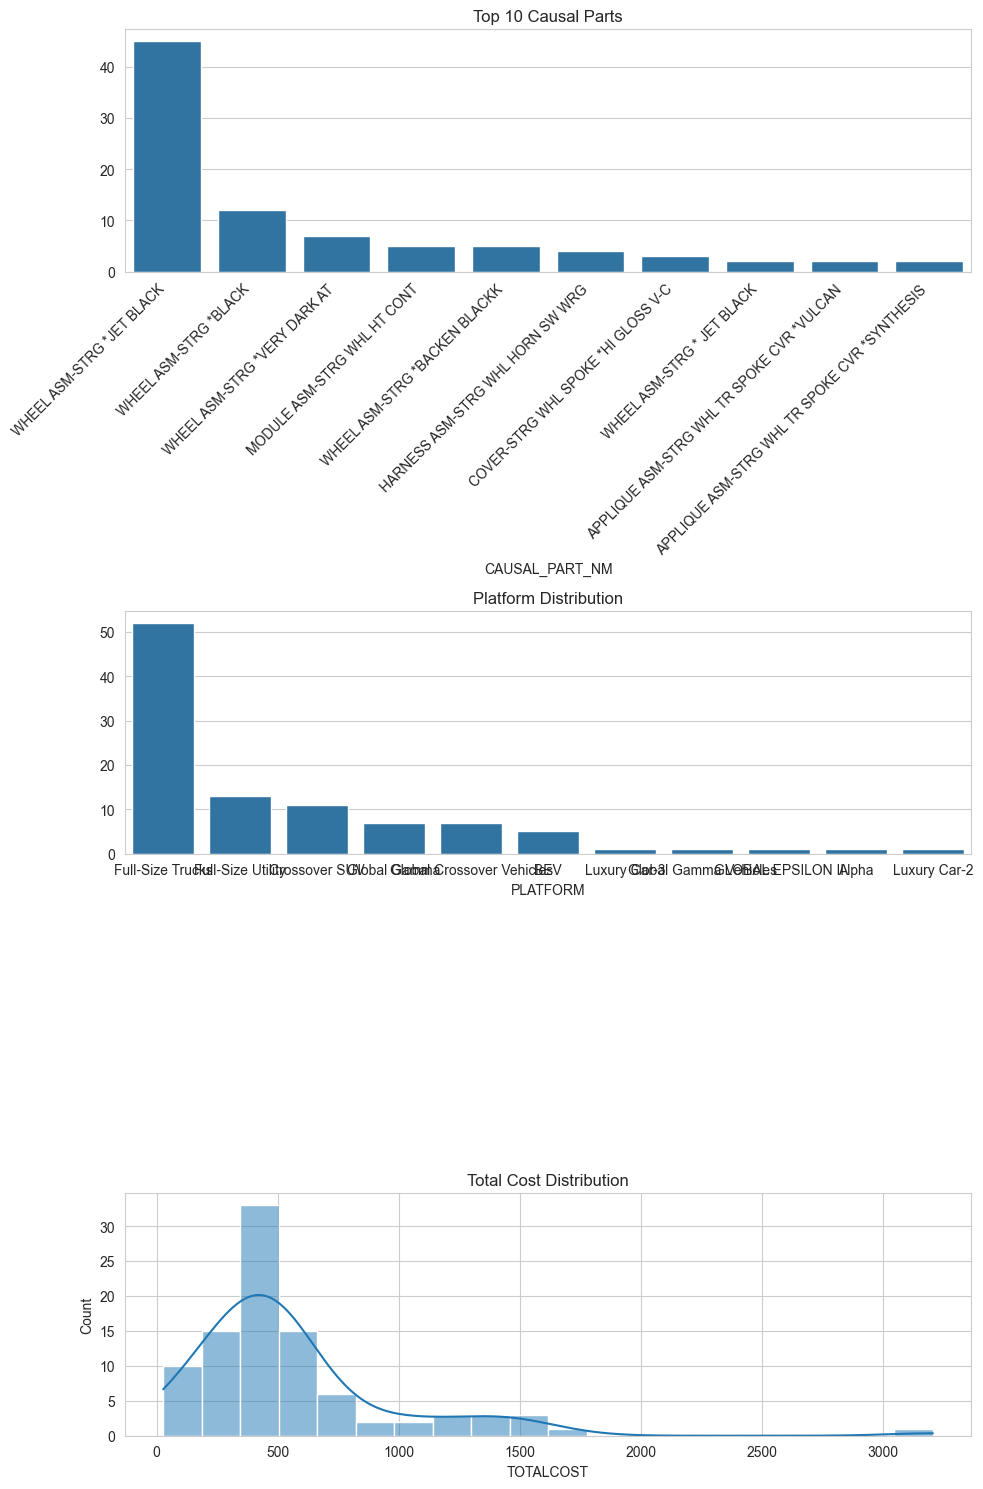

In [7]:
# Set the style for the plots
sns.set_style('whitegrid')

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Top 10 Causal Parts
top_10_parts = df['CAUSAL_PART_NM'].value_counts().nlargest(10)
sns.barplot(x=top_10_parts.index, y=top_10_parts.values, ax=axes[0])
axes[0].set_title('Top 10 Causal Parts')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Plot 2: Platform Distribution
platform_counts = df['PLATFORM'].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values, ax=axes[1])
axes[1].set_title('Platform Distribution')

# Plot 3: Total Cost Distribution
sns.histplot(df['TOTALCOST'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Total Cost Distribution')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()